In [1]:
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
import numpy as np

In [2]:
(train_dataset, test_dataset), dataset_info = tfds.load(
    name='caltech101:3.0.2',
    split=['train', 'test'],
    with_info=True,
    as_supervised=True,
    data_dir="data",
)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/3060 [00:00<?, ? examples/s]

Shuffling data/caltech101/incomplete.Q2B5R2_3.0.2/caltech101-train.tfrecord*...:   0%|          | 0/3060 [00:0…

Generating test examples...:   0%|          | 0/6084 [00:00<?, ? examples/s]

Shuffling data/caltech101/incomplete.Q2B5R2_3.0.2/caltech101-test.tfrecord*...:   0%|          | 0/6084 [00:00…

Dataset caltech101 downloaded and prepared to data/caltech101/3.0.2. Subsequent calls will reuse this data.


In [3]:
dataset_info

tfds.core.DatasetInfo(
    name='caltech101',
    full_name='caltech101/3.0.2',
    description="""
    Caltech-101 consists of pictures of objects belonging to 101 classes, plus one
    `background clutter` class. Each image is labelled with a single object. Each
    class contains roughly 40 to 800 images, totalling around 9k images. Images are
    of variable sizes, with typical edge lengths of 200-300 pixels. This version
    contains image-level labels only. The original dataset also contains bounding
    boxes.
    """,
    homepage='https://doi.org/10.22002/D1.20086',
    data_dir=PosixGPath('/tmp/tmpl6r1jnqttfds'),
    file_format=tfrecord,
    download_size=131.05 MiB,
    dataset_size=132.86 MiB,
    features=FeaturesDict({
        'image': Image(shape=(None, None, 3), dtype=uint8),
        'image/file_name': Text(shape=(), dtype=string),
        'label': ClassLabel(shape=(), dtype=int64, num_classes=102),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=

In [4]:
class_labels = dataset_info.features['label'].names
class_labels

['accordion',
 'airplanes',
 'anchor',
 'ant',
 'background_google',
 'barrel',
 'bass',
 'beaver',
 'binocular',
 'bonsai',
 'brain',
 'brontosaurus',
 'buddha',
 'butterfly',
 'camera',
 'cannon',
 'car_side',
 'ceiling_fan',
 'cellphone',
 'chair',
 'chandelier',
 'cougar_body',
 'cougar_face',
 'crab',
 'crayfish',
 'crocodile',
 'crocodile_head',
 'cup',
 'dalmatian',
 'dollar_bill',
 'dolphin',
 'dragonfly',
 'electric_guitar',
 'elephant',
 'emu',
 'euphonium',
 'ewer',
 'faces',
 'faces_easy',
 'ferry',
 'flamingo',
 'flamingo_head',
 'garfield',
 'gerenuk',
 'gramophone',
 'grand_piano',
 'hawksbill',
 'headphone',
 'hedgehog',
 'helicopter',
 'ibis',
 'inline_skate',
 'joshua_tree',
 'kangaroo',
 'ketch',
 'lamp',
 'laptop',
 'leopards',
 'llama',
 'lobster',
 'lotus',
 'mandolin',
 'mayfly',
 'menorah',
 'metronome',
 'minaret',
 'motorbikes',
 'nautilus',
 'octopus',
 'okapi',
 'pagoda',
 'panda',
 'pigeon',
 'pizza',
 'platypus',
 'pyramid',
 'revolver',
 'rhino',
 'rooste

In [5]:
def preprocess_image(image, label):
    image = tf.image.resize(image, (224, 224))
    image = tf.cast(image, tf.float32) / 255.0
    return image, label

In [6]:
train_dataset = train_dataset.map(preprocess_image).shuffle(1000).batch(32)
test_dataset = test_dataset.map(preprocess_image).batch(32)

In [7]:
from tensorflow.keras.applications import VGG19
from tensorflow.keras.models import Model

In [8]:
base_model = VGG19(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

80134624/80134624 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [9]:
model = Model(inputs=base_model.input, outputs=base_model.layers[-1].output)

In [10]:
# Function to extract features
def extract_features(dataset):
    features = []
    labels = []
    imgs = []
    for images, lbls in dataset:
        imgs.append(images)
        feature_maps = model.predict(images)
        features.append(feature_maps)
        labels.append(lbls.numpy())
    return features, labels, imgs

In [ ]:
# Extract features for train and test datasets
train_features, train_labels, train_img = extract_features(train_dataset)
#test_features, test_labels, test_img = extract_features(test_dataset)

1/1 ━━━━━━━━━━━━━━━━━━━━ 38s 38s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 31s 31s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 40s 40s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 31s 31s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 27s 27s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 23s 23s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 26s 26s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 25s 25s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 25s 25s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 25s 25s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 25s 25s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 25s 25s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 26s 26s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 25s 25s/step


In [ ]:
# Flatten the feature maps to create feature vectors
import numpy as np
train_features_flat = np.array([feature.flatten() for batch in train_features for feature in batch])
train_labels_flat = np.array([label for batch in train_labels for label in batch])
train_img_flat = np.array([img for batch in train_img for img in batch])
#test_img_flat = np.array([img for batch in test_img for img in batch])

In [ ]:
# Optionally, save the features and labels for later use
np.save('train_features.npy', train_features_flat)
np.save('train_labels.npy', train_labels_flat)
np.save('train_img.npy', train_img_flat)
#np.save('test_img.npy', test_img_flat)

KeyboardInterrupt: 

In [ ]:
# Example query: Retrieve the 5 nearest neighbors for a test image
from sklearn.neighbors import NearestNeighbors

# Fit the NearestNeighbors model
nn_model = NearestNeighbors(n_neighbors=5, algorithm='ball_tree').fit(train_features_flat)

In [ ]:
query_image, _ = next(iter(test_dataset.take(1)))

In [ ]:
query_image.shape

TensorShape([32, 224, 224, 3])

In [ ]:
query_image = query_image[3]  # Get the image in the batch
query_image.shape

TensorShape([224, 224, 3])

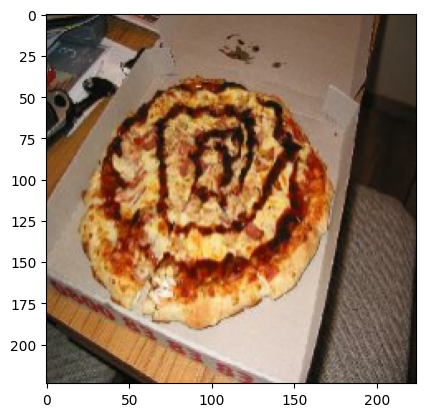

In [ ]:
# Extract features from a single query image


query_image = tf.expand_dims(query_image, axis=0)
plt.imshow(query_image[0])

In [ ]:
query_image.shape

TensorShape([1, 224, 224, 3])

In [ ]:
query_features = model.predict([query_image]).flatten().reshape(1, -1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step


In [ ]:
# Find the nearest neighbors
distances, indices = nn_model.kneighbors(query_features)
print("Indices of nearest neighbors:", indices)
print("Distances to nearest neighbors:", distances)


Indices of nearest neighbors: [[2629 2391  168  154  397]]
Distances to nearest neighbors: [[51.55358373 51.55525749 52.72407824 52.8227775  52.83157184]]


In [ ]:


retrieved_images = []
retrieved_labels = []
for indice in indices.flatten():
    retrieved_images.append(train_img_flat[indice])
    retrieved_labels.append(train_labels_flat[indice])



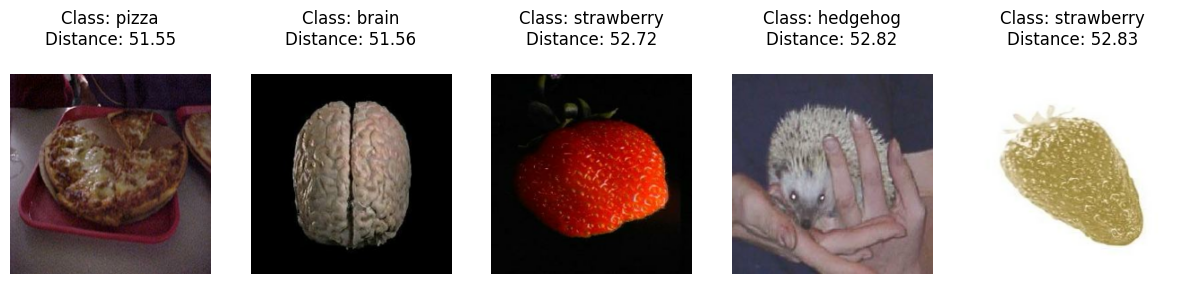

In [ ]:
plt.figure(figsize=(15, 3))
for i, image in enumerate(retrieved_images):
    plt.subplot(1, 5, i + 1)
    plt.imshow(image)
    plt.title("Class: " + class_labels[retrieved_labels[i]] + "\nDistance: " + str(
        round(distances[0][i], 2)) + "\n")
    plt.axis('off')
plt.show()

In [ ]:
def metrics(dataset):
    TP=0
    FN=0
    FP=0
    for images, lbls in dataset:
        # Imprimir la forma de las imágenes
        print(f'Forma de images: {images.shape}')

        # Iterar sobre imágenes y etiquetas en el lote
        for i, img in zip(lbls, images):
            # Imprimir la forma de cada imagen
            print(f'Forma de img: {img.shape}')
            """plt.imshow(img)"""
            query_image = tf.expand_dims(img, axis=0)
            query_features = model.predict([query_image]).flatten().reshape(1, -1)
            distances, indices = nn_model.kneighbors(query_features)
            for indice in indices.flatten():
                print(f'Etiqueta: {i.numpy()}')
                et=train_labels_flat[indice]
                print(f'retrieval: {et}')
                if i.numpy() == et:
                  TP=TP+1
                else
                  FP=FP+1

            break
            # Imprimir el valor de la etiqueta (suponiendo que lbls es un tensor de una sola dimensión)


        # Salir después del primer lote para evitar iterar sobre todo el dataset
        break


In [ ]:
import numpy as np
from sklearn.metrics import precision_score, recall_score

def metrics(dataset):
    TP = 0
    FN = 0
    retrieved_labels = []
    true_labels = []

    for images, lbls in dataset:
        # Iterar sobre imágenes y etiquetas en el lote
        for i, img in zip(lbls, images):
            # Expansión y predicción de características
            query_image = tf.expand_dims(img, axis=0)
            query_features = model.predict(query_image).flatten().reshape(1, -1)
            distances, indices = nn_model.kneighbors(query_features)

            # Obtener etiquetas recuperadas
            retrieved_labels_batch = [train_labels_flat[indice] for indice in indices.flatten()]

            # Etiqueta verdadera de la imagen
            true_label = i.numpy()

            # Agregar etiquetas verdaderas y recuperadas
            true_labels.append(true_label)
            retrieved_labels.extend(retrieved_labels_batch)

            # Incrementar TP y FN
            if true_label in retrieved_labels_batch:
                TP += 1
            else:
                FN += 1

        # Salir después del primer lote para evitar iterar sobre todo el dataset
    # Convertir listas a arrays y alinear tamaños
    true_labels = np.array(true_labels)
    retrieved_labels = np.array(retrieved_labels[:len(true_labels)])

    # Calcular precisión y recall
    precision = precision_score(true_labels, retrieved_labels, average='macro', zero_division=0)
    recall = recall_score(true_labels, retrieved_labels, average='macro', zero_division=0)

    print(f'Precisión: {precision}')
    print(f'Recall: {recall}')



In [ ]:
import numpy as np
from sklearn.metrics import precision_score, recall_score
import concurrent.futures
import tensorflow as tf
from sklearn.neighbors import NearestNeighbors

def process_image(img, lbls):
    # Expansión y predicción de características
    query_image = tf.expand_dims(img, axis=0)
    query_features = model.predict(query_image).flatten().reshape(1, -1)
    distances, indices = nn_model.kneighbors(query_features)

    # Obtener etiquetas recuperadas
    retrieved_labels_batch = [train_labels_flat[indice] for indice in indices.flatten()]

    # Etiqueta verdadera de la imagen
    true_label = lbls.numpy()

    return true_label, retrieved_labels_batch

def metrics(dataset):
    true_labels = []
    retrieved_labels = []

    # Usar un ThreadPoolExecutor para paralelizar el procesamiento
    with concurrent.futures.ThreadPoolExecutor() as executor:
        future_to_image = []

        for images, lbls in dataset:
            # Enviar tareas al executor
            for img, lbl in zip(images, lbls):
                future = executor.submit(process_image, img, lbl)
                future_to_image.append(future)

        # Recoger resultados
        for future in concurrent.futures.as_completed(future_to_image):
            true_label, retrieved_labels_batch = future.result()
            true_labels.append(true_label)
            retrieved_labels.extend(retrieved_labels_batch)

    # Convertir listas a arrays y alinear tamaños
    true_labels = np.array(true_labels)
    retrieved_labels = np.array(retrieved_labels[:len(true_labels)])

    # Calcular precisión y recall
    precision = precision_score(true_labels, retrieved_labels, average='macro', zero_division=0)
    recall = recall_score(true_labels, retrieved_labels, average='macro', zero_division=0)

    print(f'Precisión: {precision}')
    print(f'Recall: {recall}')


In [ ]:
type(test_dataset)

tensorflow.python.data.ops.batch_op._BatchDataset

In [71]:
metrics(test_dataset)

Streaming output truncated to the last 5000 lines.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import os
import shutil

# Ruta a Google Drive
drive_path = '/content/drive/My Drive/trainInfo/'

# Crear la carpeta en Google Drive si no existe
os.makedirs(drive_path, exist_ok=True)

# Archivos a copiar
files_to_copy = [
    '/content/train_features.npy',
    '/content/train_img.npy'
]

# Copiar archivos al directorio de Google Drive
for file_path in files_to_copy:
    shutil.copy(file_path, drive_path)

print('Archivos copiados exitosamente a Google Drive.')


Archivos copiados exitosamente a Google Drive.
